In [101]:
import pandas as pd
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [102]:
data = pd.read_csv("almond_data.csv")

data = data.iloc[:, 1:]

data.head()

data.columns = data.columns.str.strip()

features = [
    "Length (major axis)",
    "Width (minor axis)",
    "Thickness (depth)",
    "Area",
    "Perimeter",
    "Roundness",
    "Solidity",
    "Compactness",
    "Aspect Ratio",
    "Eccentricity",
    "Extent",
    "Convex hull(convex area)",
]
target = "Type"

In [103]:
impute_features = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)',
                   'Area', 'Perimeter', 'Solidity', 'Compactness', 'Extent', 'Convex hull(convex area)']

knn_imputer = KNNImputer(n_neighbors=51)

data_imputed = data.copy()

types = data[target].unique()
for almond_type in types:

    type_data = data[data[target] == almond_type].copy()

    type_features = type_data[impute_features]

    imputed_values = knn_imputer.fit_transform(type_features)

    type_data[impute_features] = imputed_values

    data_imputed.update(type_data)

print("Missing values after imputation:")
print(data_imputed.isna().sum())


Missing values after imputation:
Length (major axis)            0
Width (minor axis)             0
Thickness (depth)              0
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64


In [104]:
def calculate_statistics(df, features):
    stats = {}
    for feature in features:
        stats[feature] = {
            'Mean': df[feature].mean(),
            'Median': df[feature].median(),
            'Mode': df[feature].mode()[0],
            'Std': df[feature].std()
        }
    return pd.DataFrame(stats).T

stats_before = calculate_statistics(data, impute_features)

stats_after = calculate_statistics(data_imputed, impute_features)

print("Statistics Before Imputation:")
print(stats_before)
print("\nStatistics After Imputation:")
print(stats_after)

Statistics Before Imputation:
                                  Mean        Median          Mode  \
Length (major axis)         290.609274    279.879883    392.055817   
Width (minor axis)          171.025915    170.168365    116.737297   
Thickness (depth)           109.705378    110.280136     84.924919   
Area                      26511.117374  23440.500000  10535.000000   
Perimeter                   743.863770    707.487369    460.960458   
Solidity                      0.955828      0.970422      0.718772   
Compactness                   1.825233      1.576412      2.229812   
Extent                        0.724587      0.733720      0.579072   
Convex hull(convex area)  27696.218159  24589.000000  31150.000000   

                                   Std  
Length (major axis)          62.719433  
Width (minor axis)           29.916529  
Thickness (depth)            18.940597  
Area                      13782.561344  
Perimeter                   230.632076  
Solidity               

In [105]:
data_imputed['Roundness'] = (4 * data_imputed['Area']) / (np.pi * data_imputed['Length (major axis)'] ** 2)

data_imputed['Aspect Ratio'] = data_imputed['Length (major axis)'] / data_imputed['Width (minor axis)']

data_imputed['Eccentricity'] = np.sqrt(1 - (data_imputed['Width (minor axis)'] / data_imputed['Length (major axis)']) ** 2)

print(data_imputed[['Roundness', 'Aspect Ratio', 'Eccentricity']].head())


   Roundness  Aspect Ratio  Eccentricity
0   0.386488      1.197572      0.550216
1   0.384040      1.180115      0.530994
2   0.388870      1.180096      0.530973
3   0.385796      1.172760      0.522419
4   0.370941      1.111586      0.436682


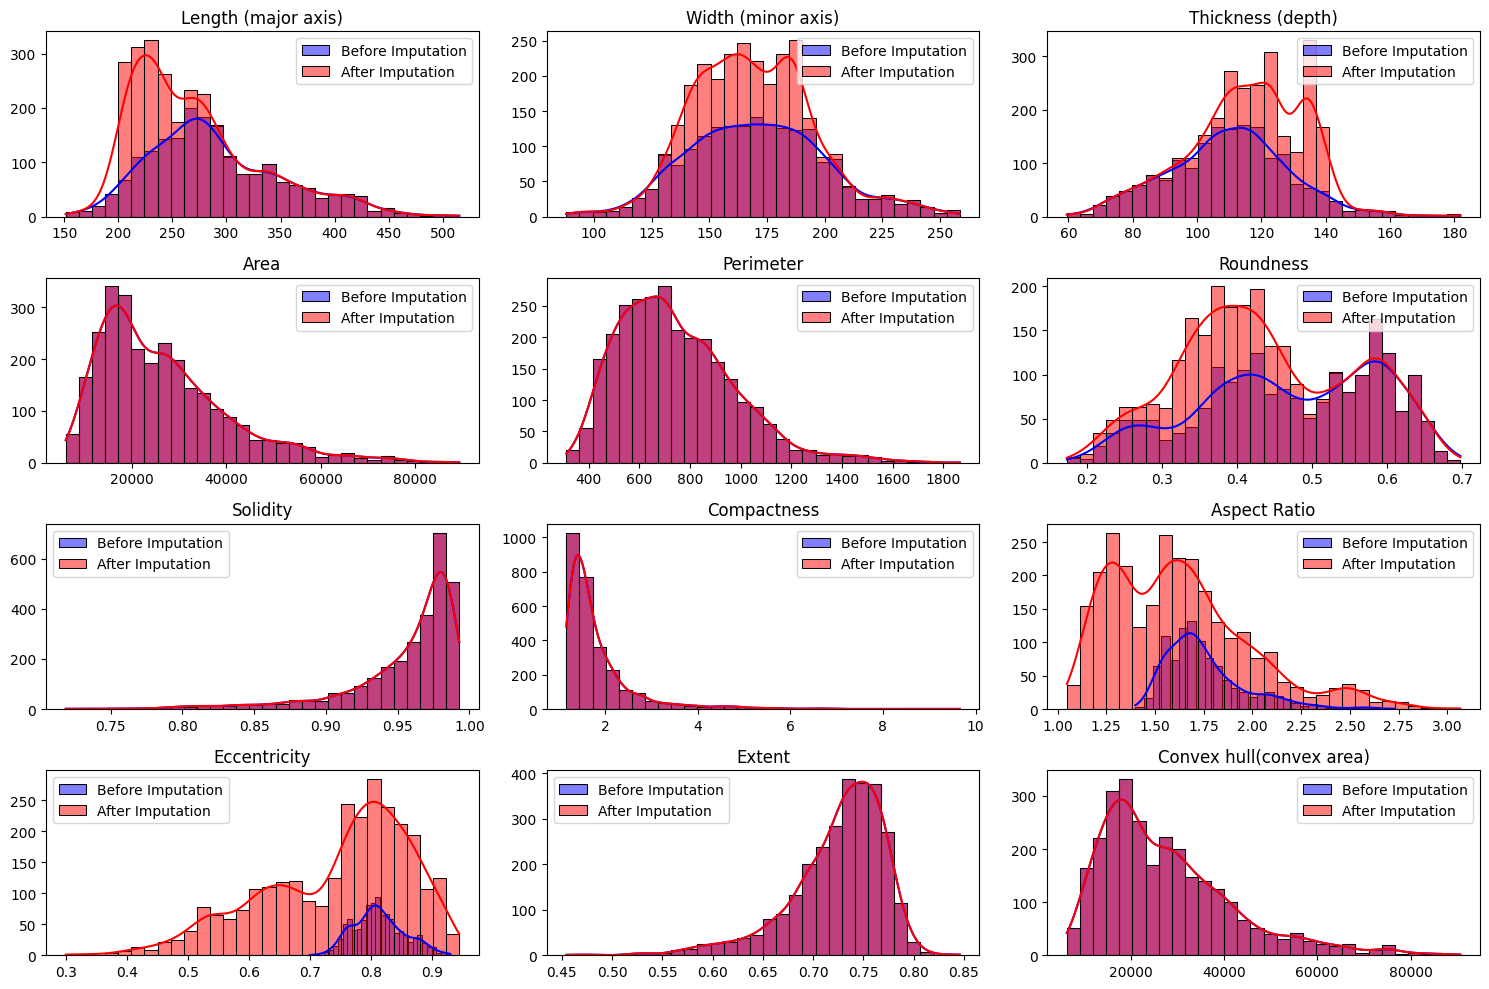

In [106]:
def plot_feature_distributions(df_before, df_after, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(4, 3, i + 1)
        sns.histplot(df_before[feature].dropna(), kde=True, label='Before Imputation', color='blue', bins=30, alpha=0.5)
        sns.histplot(df_after[feature].dropna(), kde=True, label='After Imputation', color='red', bins=30, alpha=0.5)
        plt.title(f'{feature}')
        plt.xlabel('')
        plt.ylabel('')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_feature_distributions(data, data_imputed, features)


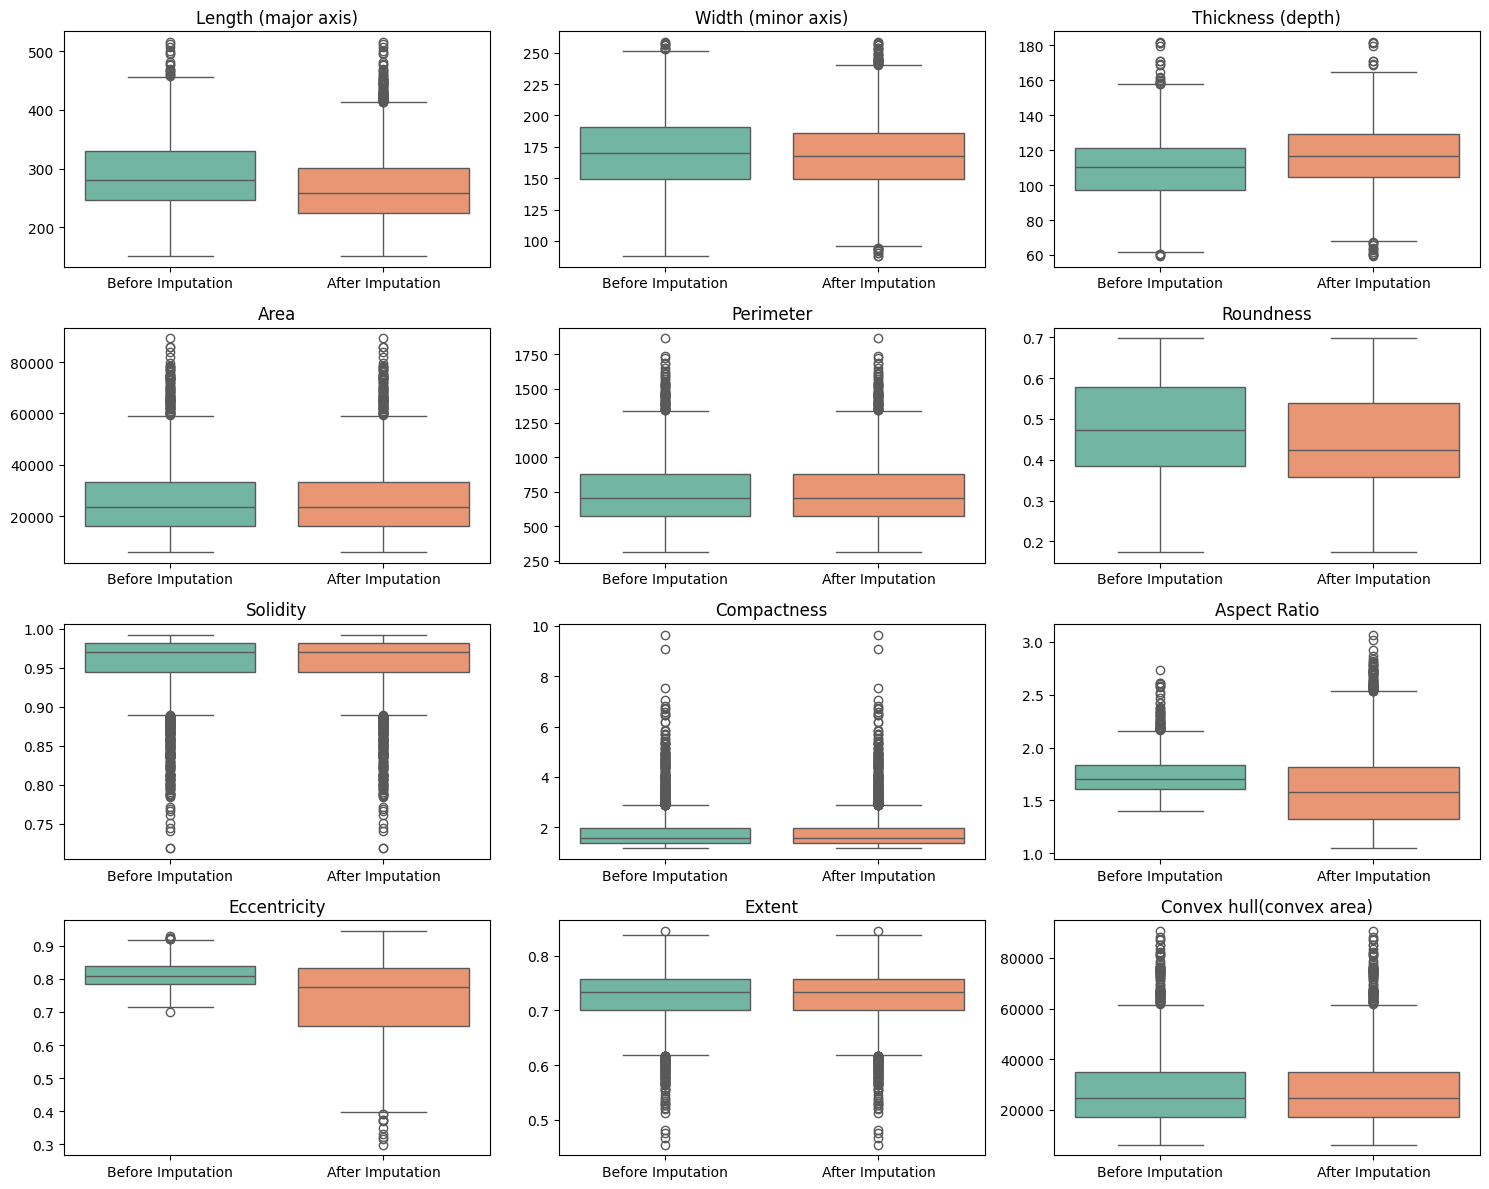

In [107]:
def plot_box_plots_comparison(df_before, df_after, features):
    plt.figure(figsize=(15, 12))
    
    for i, feature in enumerate(features):
        plt.subplot(4, 3, i + 1)
        
        df_before_plot = df_before[[feature]].copy()
        df_before_plot['Imputation Status'] = 'Before Imputation'
        
        df_after_plot = df_after[[feature]].copy()
        df_after_plot['Imputation Status'] = 'After Imputation'
        
        df_plot = pd.concat([df_before_plot, df_after_plot], ignore_index=True)
        
        sns.boxplot(x='Imputation Status', y=feature, data=df_plot,hue='Imputation Status', palette='Set2', showfliers=True)
        
        plt.title(f'{feature}')
        plt.xlabel('')
        plt.ylabel('')
        

    plt.tight_layout()
    plt.show()

plot_box_plots_comparison(data, data_imputed, features)



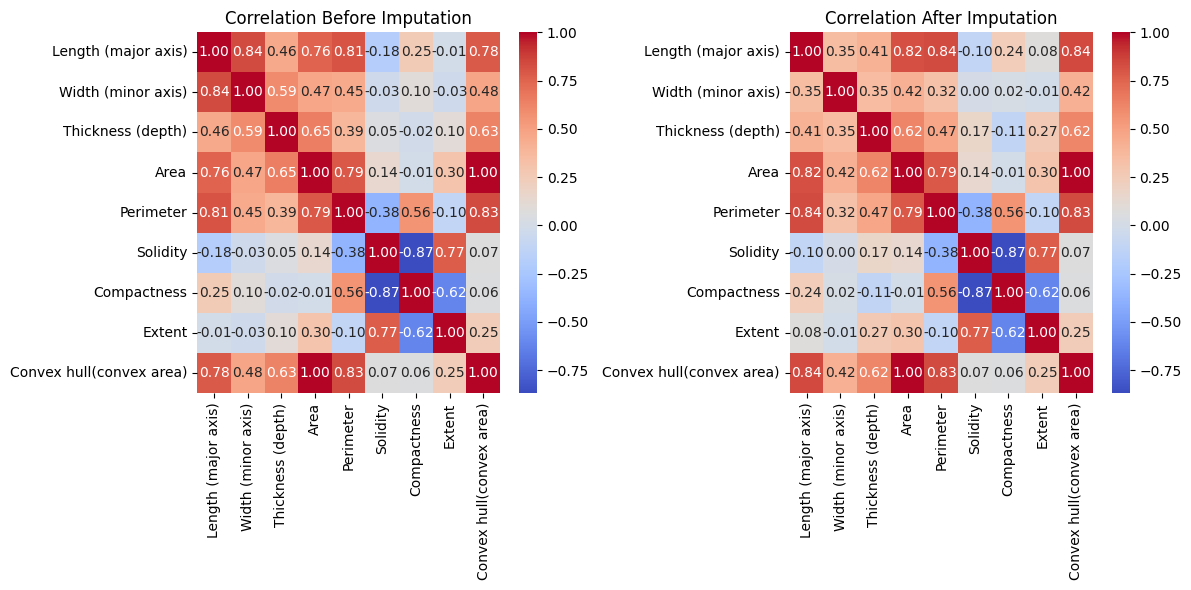

In [108]:
corr_before = data[impute_features].corr()
corr_after = data_imputed[impute_features].corr()

def plot_correlation_heatmaps(corr_before, corr_after):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(corr_before, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Before Imputation')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(corr_after, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation After Imputation')
    
    plt.tight_layout()
    plt.show()

plot_correlation_heatmaps(corr_before, corr_after)


In [109]:
scaler = StandardScaler()

normalized_data = data_imputed.copy()
normalized_data[features] = scaler.fit_transform(data_imputed[features])

print(normalized_data.head())


   Length (major axis)  Width (minor axis)  Thickness (depth)      Area  \
0             0.027587            2.231267           0.691007 -0.282445   
1             0.083328            2.467504           0.715297 -0.252039   
2            -0.009197            2.287154           0.582757 -0.299317   
3             0.027587            2.413622           0.589500 -0.285384   
4            -0.254009            2.314838          -0.440028 -0.540135   

   Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0  -0.433887  -0.463787  0.443447    -0.462225     -1.192534     -1.613218   
1  -0.272686  -0.485193  0.037282    -0.281376     -1.241179     -1.772577   
2  -0.420314  -0.442965  0.289024    -0.425060     -1.241231     -1.772753   
3  -0.358367  -0.469837  0.244616    -0.358040     -1.261672     -1.843678   
4  -0.516157  -0.599727 -0.110601    -0.246674     -1.432132     -2.554502   

     Extent  Convex hull(convex area)   Type  
0 -0.914228                 -0.31